# 0. 경로 지정

In [2]:
import os
import sys

print(os.getcwd())
print(sys.path)
# 현재 노트북 경로 기준으로 상위 2단계 경로 계산
notebook_path = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_path, "..", ".."))

# 루트를 sys.path에 추가
if project_root not in sys.path:
    sys.path.append(project_root)



/Volumes/MINDB/25년/Pseudo-Entertainment/tests/sms
['/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python313.zip', '/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python3.13', '/opt/homebrew/Cellar/python@3.13/3.13.4/Frameworks/Python.framework/Versions/3.13/lib/python3.13/lib-dynload', '', '/Volumes/MINDB/25년/Pseudo-Entertainment/.venv/lib/python3.13/site-packages']


# 이미지 생성

In [2]:
from agents.image.modules.chains import set_image_generation_chain
from agents.image.modules.extracted_persona import PERSONA
chain = set_image_generation_chain()

In [ ]:
import base64
from PIL import Image as PILImage
from io import BytesIO
from IPython.display import Image, display

def show_image(response, save_path):
    # base64 디코딩
    base64_str = response.content[-1].get('image_url').get('url').split(',')[-1]
    image_data = base64.b64decode(base64_str)
    
    # 이미지 열기 (PIL로)
    with BytesIO(image_data) as img_buffer:
        img = PILImage.open(img_buffer)
        # 512x512로 리사이즈
        img_resized = img.resize((512, 512), PILImage.LANCZOS)
        # 저장
        img_resized.save(save_path)

    # 디스플레이 (IPython)
    with open(save_path, 'rb') as f:
        display(Image(data=f.read()))

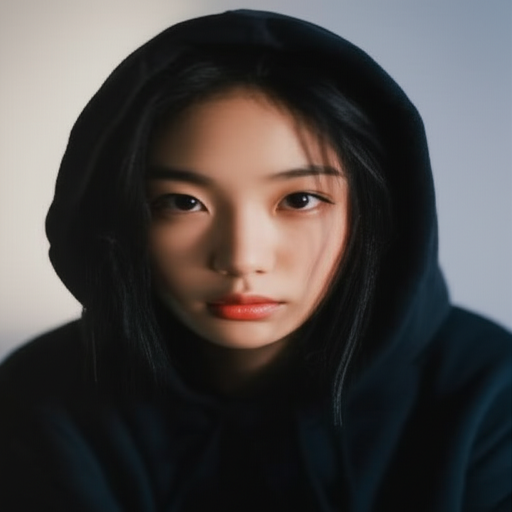

In [4]:
tries = 5

while tries > 0:
    ## IMAGE_SAFTEY 로 이미지가 생성이 되지 않는 경우를 피하기 위해서 tries
    response = chain.invoke({
        'persona' : PERSONA
    })

    if response.response_metadata.get('finish_reason') == 'IMAGE_SAFETY':
        tries -= 1
        print(f"Image Load {5-tries} Fail ...")
        continue
    else:
        save_path = os.path.join(notebook_path,  'try_02.png')
        show_image(response, save_path)
        break


In [5]:
type(response)

langchain_core.messages.ai.AIMessage

## Image Reference

In [6]:
from agents.image.modules.chains import set_image_to_image_generation_chain
from agents.image.modules.extracted_persona_ver2 import PERSONA as PERSONA_VER2

image_chain = set_image_to_image_generation_chain()

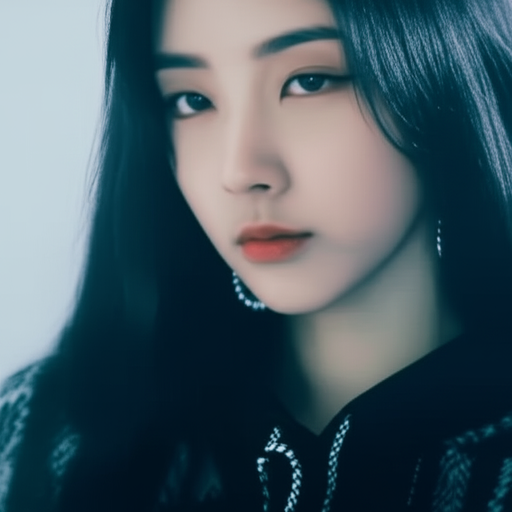

In [9]:
tries = 5

with open(os.path.join(notebook_path , 'try_01.png'), 'rb') as f:
    image_data = base64.b64encode(f.read()).decode('utf-8')

while tries > 0:
    response = image_chain.invoke({
        'persona' : PERSONA_VER2,
        'image_data' : image_data
    })

    if response.response_metadata.get('finish_reason') == 'IMAGE_SAFETY':
        tries -= 1
        print(f"Image Load {5-tries} Fail ...")
        continue
    else:
        save_path = os.path.join(notebook_path, 'with_fix_sample.png')
        show_image(response, save_path)
        break


## Huggingface 모델 다운로드 테스트

In [1]:
from huggingface_hub import hf_hub_download
import zipfile
import os

def download_and_extract_models():
    models_dir = "models"
    if not os.path.exists(models_dir):
        print("models 폴더가 없으므로 다운로드 시작")

        zip_path = hf_hub_download(
            repo_id="nonsignal007/hyperlora_models",
            filename="models.zip",
            repo_type="model"
        )

        with zipfile.ZipFile(zip_path, "r") as zip_ref:
            zip_ref.extractall(models_dir)

        print("모델 다운로드 및 압축 해제 완료")
    else:
        print("models 폴더가 이미 존재합니다")

if __name__ == "__main__":
    download_and_extract_models()

models 폴더가 없으므로 다운로드 시작


models.zip:  16%|#6        | 2.72G/16.8G [00:00<?, ?B/s]

KeyboardInterrupt: 

## FixedFaceGenerationNode

- chain 확인 

In [3]:
from agents.image.modules.chains import set_comfyui_generation_chain
from agents.image.modules.extracted_persona import PERSONA

chain = set_comfyui_generation_chain()

response = chain.invoke({
    'persona': PERSONA,
})


In [4]:
response['prompt']

'A 22-year-old Korean female singer-songwriter NEEDZE, ISTP personality, summer vacation by the night sea, dreamy and atmospheric, wearing oversized t-shirt and denim pants, vintage sunglasses, natural pose, film camera style, city pop retro vibe, soft and emotional sound, blending with the night sea, neon green and deep blue color accents, short and concise sentence, minimal aesthetics, cool monologue, unexpected cuteness, short quote style, wind sound, wave sound, summer melody, walking my own summer'

In [5]:
response['negative_prompt']

'nsfw, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, artist name, unrealistic'